<a href="https://colab.research.google.com/github/WILVERTOM/reposit/blob/testing/Colab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

In [ ]:
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split # Dividir la data
from sklearn.linear_model import LogisticRegression # RL
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [ ]:
df = pd.read_excel("base-fuga.xls")
df.shape

(5000, 21)

# Nueva sección

In [ ]:
df.head(5)

,idcliente,plan_internacional_preferente,plan_internet_ilimitado,mb_navegados,total_minutos_horario_normal,total_llamadas_horario_normal,cobro_llamadas_horario_normal,total_minutos_horario_reducido,total_llamadas_horario_reducido,cobro_llamadas_horario_reducido,...,total_llamadas_horario_nocturno,cobro_llamadas_horario_nocturno,total_minutos_llamadas_internacionales,total_llamadas_internacionales,cobro_llamadas_internacionales,llamadas_a_servicio_de_atención_al_cliente,fuga,minutos_total,llamadas_total,cobro_total
0,1,No,Si,2500,265.1,110,24834,197.4,99,9246,...,91,6067,10.0,3,1488,1,Vigente,717.2,303,41635
1,2,No,Si,2600,161.6,123,15136,195.5,103,9158,...,103,6309,13.7,3,2039,1,Vigente,625.2,332,32642
2,3,No,No,0,243.4,114,22800,121.2,110,5675,...,104,4033,12.2,5,1813,0,Vigente,539.4,333,34321
3,4,Si,No,0,299.4,71,28046,61.9,88,2898,...,89,4882,6.6,7,818,2,Vigente,564.8,255,36644
4,5,Si,No,0,166.7,113,15615,148.3,122,6948,...,121,4634,10.1,3,1252,3,Vigente,512.0,359,28449


In [ ]:
df.describe()

,idcliente,mb_navegados,total_minutos_horario_normal,total_llamadas_horario_normal,cobro_llamadas_horario_normal,total_minutos_horario_reducido,total_llamadas_horario_reducido,cobro_llamadas_horario_reducido,total_minutos_horario_nocturno,total_llamadas_horario_nocturno,cobro_llamadas_horario_nocturno,total_minutos_llamadas_internacionales,total_llamadas_internacionales,cobro_llamadas_internacionales,llamadas_a_servicio_de_atención_al_cliente,minutos_total,llamadas_total,cobro_total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,775.520000,180.288900,100.029400,16887.969200,200.636560,100.191000,9396.937600,200.391620,99.919200,4968.776200,10.261780,4.435200,1502.224200,1.570400,591.578860,304.574800,32755.907200
std,1443.520003,1354.639339,53.894699,19.831197,5048.311214,50.551309,19.826496,2367.561034,50.527789,19.958686,1252.845142,2.761396,2.456788,409.859667,1.306363,89.071881,34.320361,5701.476482
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,284.300000,191.000000,12635.000000
25%,1250.750000,0.000000,143.700000,87.000000,13461.000000,166.375000,87.000000,7791.000000,166.900000,87.000000,4138.000000,8.500000,3.000000,1234.000000,1.000000,531.200000,282.000000,28898.000000
50%,2500.500000,0.000000,180.100000,100.000000,16872.000000,201.000000,100.000000,9417.000000,200.400000,100.000000,4970.000000,10.300000,4.000000,1504.000000,1.000000,592.400000,305.000000,32768.500000
75%,3750.250000,1700.000000,216.200000,113.000000,20249.000000,234.100000,114.000000,10965.000000,234.700000,113.000000,5819.000000,12.000000,6.000000,1769.000000,2.000000,652.025000,328.000000,36540.500000
max,5000.000000,5200.000000,351.500000,165.000000,32928.000000,363.700000,170.000000,17031.000000,395.000000,175.000000,9791.000000,20.000000,20.000000,2931.000000,9.000000,885.000000,416.000000,52650.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   idcliente                                   5000 non-null   int64  
 1   plan_internacional_preferente               5000 non-null   object 
 2   plan_internet_ilimitado                     5000 non-null   object 
 3   mb_navegados                                5000 non-null   int64  
 4   total_minutos_horario_normal                5000 non-null   float64
 5   total_llamadas_horario_normal               5000 non-null   int64  
 6   cobro_llamadas_horario_normal               5000 non-null   int64  
 7   total_minutos_horario_reducido              5000 non-null   float64
 8   total_llamadas_horario_reducido             5000 non-null   int64  
 9   cobro_llamadas_horario_reducido             5000 non-null   int64  
 10  total_minuto

In [ ]:
def estado_fugado (fuga):
  if fuga =="Vigente":
    return 0
  else:
    return 1


In [ ]:
df['fuga'].value_counts()

Vigente    4293
Fugado      707
Name: fuga, dtype: int64

Text(0.5, 1.0, 'clientes')

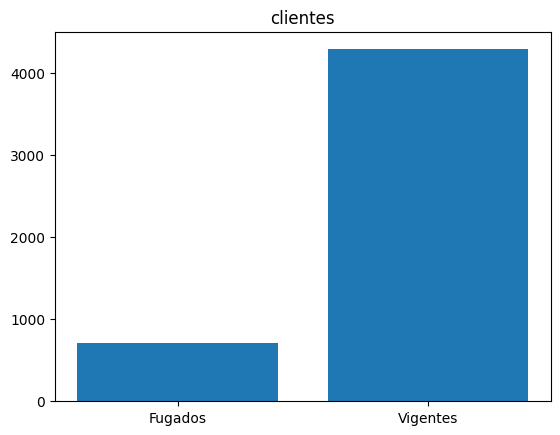

In [ ]:

Fugado = df.fuga[df.fuga == 'Fugado'].count()

Vigente = df.fuga[df.fuga == 'Vigente'].count()

plt.bar(['Fugados', 'Vigentes'], [Fugado, Vigente])
plt.title('clientes')

In [ ]:
df['plan_internet_ilimitado'].value_counts()

No    3677
Si    1323
Name: plan_internet_ilimitado, dtype: int64

Text(0.5, 1.0, 'Plan de internet')

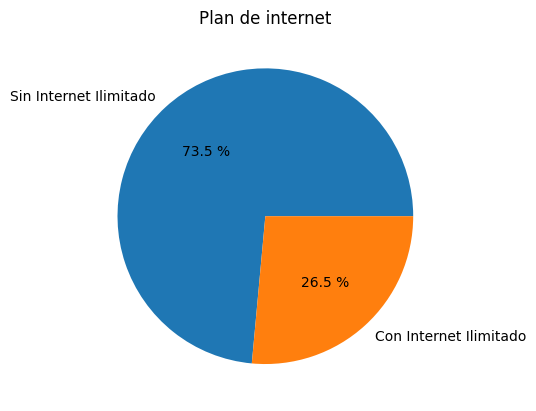

In [ ]:
plt.pie(df.plan_internet_ilimitado.value_counts(),labels=['Sin Internet Ilimitado', 'Con Internet Ilimitado'], autopct="%0.1f %%")
plt.title('Plan de internet')

In [ ]:
corr = df.corr('spearman')
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-27-b6232f620ad5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr('spearman')


,idcliente,mb_navegados,total_minutos_horario_normal,total_llamadas_horario_normal,cobro_llamadas_horario_normal,total_minutos_horario_reducido,total_llamadas_horario_reducido,cobro_llamadas_horario_reducido,total_minutos_horario_nocturno,total_llamadas_horario_nocturno,cobro_llamadas_horario_nocturno,total_minutos_llamadas_internacionales,total_llamadas_internacionales,cobro_llamadas_internacionales,llamadas_a_servicio_de_atención_al_cliente,minutos_total,llamadas_total,cobro_total
idcliente,1.000000,-0.042294,-0.002395,-0.024817,-0.002395,-0.002146,0.002119,-0.002147,-0.012866,-0.013254,-0.012809,0.008463,-0.025456,0.011469,0.016333,-0.009155,-0.019778,-0.005878
mb_navegados,-0.042294,1.000000,0.008779,-0.004000,0.008779,0.023936,-0.001567,0.023943,0.000169,0.006632,0.000156,0.002402,-0.010094,-0.000224,-0.012190,0.016104,-0.000757,0.015103
total_minutos_horario_normal,-0.002395,0.008779,1.000000,0.005721,1.000000,-0.011386,0.007948,-0.011406,0.002965,0.003409,0.002942,-0.022560,-0.006131,-0.027444,-0.001479,0.577824,0.010801,0.869268
total_llamadas_horario_normal,-0.024817,-0.004000,0.005721,1.000000,0.005721,0.002406,0.010889,0.002404,0.002504,-0.004324,0.002484,0.007111,0.008951,0.001981,-0.013574,0.006579,0.561633,0.002944
cobro_llamadas_horario_normal,-0.002395,0.008779,1.000000,0.005721,1.000000,-0.011386,0.007948,-0.011406,0.002965,0.003409,0.002942,-0.022560,-0.006131,-0.027444,-0.001479,0.577824,0.010801,0.869268
total_minutos_horario_reducido,-0.002146,0.023936,-0.011386,0.002406,-0.011386,1.000000,0.002021,1.000000,-0.015731,0.014070,-0.015734,0.008880,0.011247,0.003619,-0.017930,0.538109,0.009634,0.388200
total_llamadas_horario_reducido,0.002119,-0.001567,0.007948,0.010889,0.007948,0.002021,1.000000,0.002031,0.007960,-0.016275,0.007982,-0.011466,0.006380,-0.010872,0.012159,0.009619,0.552358,0.009343
cobro_llamadas_horario_reducido,-0.002147,0.023943,-0.011406,0.002404,-0.011406,1.000000,0.002031,1.000000,-0.015737,0.014061,-0.015740,0.008875,0.011255,0.003611,-0.017934,0.538091,0.009631,0.388179
total_minutos_horario_nocturno,-0.012866,0.000169,0.002965,0.002504,0.002965,-0.015731,0.007960,-0.015737,1.000000,0.017127,0.999999,-0.006649,-0.013122,-0.002105,-0.015307,0.547566,0.015047,0.210007
total_llamadas_horario_nocturno,-0.013254,0.006632,0.003409,-0.004324,0.003409,0.014070,-0.016275,0.014061,0.017127,1.000000,0.017099,0.005179,-0.000466,0.003676,-0.001145,0.015327,0.555794,0.009815


In [ ]:
corr = df.corr() #default pearson = distribución normal
corr.style.background_gradient(cmap = 'coolwarm')

<ipython-input-28-ca6a73907d63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr() #default pearson = distribución normal


,idcliente,mb_navegados,total_minutos_horario_normal,total_llamadas_horario_normal,cobro_llamadas_horario_normal,total_minutos_horario_reducido,total_llamadas_horario_reducido,cobro_llamadas_horario_reducido,total_minutos_horario_nocturno,total_llamadas_horario_nocturno,cobro_llamadas_horario_nocturno,total_minutos_llamadas_internacionales,total_llamadas_internacionales,cobro_llamadas_internacionales,llamadas_a_servicio_de_atención_al_cliente,minutos_total,llamadas_total,cobro_total
idcliente,1.000000,-0.040952,0.000448,-0.024325,0.000450,0.000245,0.008826,0.000248,-0.009955,-0.013364,-0.009935,0.008468,-0.025192,0.011805,0.013054,-0.004975,-0.018532,-0.000833
mb_navegados,-0.040952,1.000000,0.005381,0.000883,0.005376,0.019490,-0.003954,0.019499,0.005541,0.002676,0.005535,0.002463,0.000124,-0.000202,-0.007086,0.017537,-0.000209,0.014059
total_minutos_horario_normal,0.000448,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010759,0.011799,0.004236,0.011782,-0.019486,-0.001303,-0.025214,0.002733,0.605057,0.008184,0.881748
total_llamadas_horario_normal,-0.024325,0.000883,0.001935,1.000000,0.001937,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002801,0.013097,0.010893,0.011220,-0.010739,0.002771,0.575943,0.002849
cobro_llamadas_horario_normal,0.000450,0.005376,1.000000,0.001937,1.000000,-0.010746,0.008128,-0.010755,0.011801,0.004235,0.011784,-0.019490,-0.001307,-0.025219,0.002725,0.605061,0.008184,0.881750
total_minutos_horario_reducido,0.000245,0.019490,-0.010750,-0.000699,-0.010746,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,-0.003830,-0.013823,0.551594,0.009597,0.401807
total_llamadas_horario_reducido,0.008826,-0.003954,0.008128,0.003754,0.008128,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001795,-0.007458,0.005574,-0.007593,0.006235,0.007266,0.572300,0.008199
cobro_llamadas_horario_reducido,0.000248,0.019499,-0.010759,-0.000695,-0.010755,1.000000,0.002778,1.000000,-0.016644,0.013420,-0.016648,0.000132,0.008392,-0.003834,-0.013837,0.551586,0.009608,0.401797
total_minutos_horario_nocturno,-0.009955,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016644,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.002899,-0.008533,0.564757,0.017103,0.223069
total_llamadas_horario_nocturno,-0.013364,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013420,0.026972,1.000000,0.026945,0.000391,-0.000156,-0.001294,-0.008283,0.025492,0.568825,0.015150


In [ ]:
df = pd.read_excel("base-fuga.xls", usecols= ["idcliente","fuga","plan_internet_ilimitado","llamadas_total","cobro_total"])
df.head(10)

,idcliente,plan_internet_ilimitado,fuga,llamadas_total,cobro_total
0,1,Si,Vigente,303,41635
1,2,Si,Vigente,332,32642
2,3,No,Vigente,333,34321
3,4,No,Vigente,255,36644
4,5,No,Vigente,359,28449
5,6,No,Vigente,323,37097
6,7,Si,Vigente,321,43150
7,8,No,Vigente,275,25664
8,9,No,Vigente,271,40399
9,10,Si,Vigente,297,44102


In [ ]:
#Label encoding
df.loc[df.plan_internet_ilimitado == 'Si', 'mb_ilimitado']=1
df.loc[df.plan_internet_ilimitado == 'No', 'mb_ilimitado']=2

df.loc[df.fuga == 'Vigente','fuga2']=1
df.loc[df.fuga == 'Fugado','fuga2']=2

df.head(10)

,idcliente,plan_internet_ilimitado,fuga,llamadas_total,cobro_total,mb_ilimitado,fuga2
0,1,Si,Vigente,303,41635,1.0,1.0
1,2,Si,Vigente,332,32642,1.0,1.0
2,3,No,Vigente,333,34321,2.0,1.0
3,4,No,Vigente,255,36644,2.0,1.0
4,5,No,Vigente,359,28449,2.0,1.0
5,6,No,Vigente,323,37097,2.0,1.0
6,7,Si,Vigente,321,43150,1.0,1.0
7,8,No,Vigente,275,25664,2.0,1.0
8,9,No,Vigente,271,40399,2.0,1.0
9,10,Si,Vigente,297,44102,1.0,1.0


In [ ]:
df.drop(['idcliente','plan_internet_ilimitado','fuga'], axis=1, inplace = True)
df.dropna(inplace = True)
y_data = df['fuga2']
x_data = df.drop('fuga2', axis = 1)

In [ ]:
y_data

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4995    1.0
4996    2.0
4997    1.0
4998    1.0
4999    1.0
Name: fuga2, Length: 5000, dtype: float64

In [ ]:
x_data

,llamadas_total,cobro_total,mb_ilimitado
0,303,41635,1.0
1,332,32642,1.0
2,333,34321,2.0
3,255,36644,2.0
4,359,28449,2.0
...,...,...,...
4995,374,41375,1.0
4996,278,36762,2.0
4997,318,28553,2.0
4998,254,32558,2.0


In [ ]:
x_training, x_test, y_training, y_test = train_test_split(x_data, y_data,
                                                         test_size = 0.2, random_state = 2023) #semilla

In [ ]:
x_training.shape

(4000, 3)

In [ ]:
modelLR = LogisticRegression()
modelLR.fit(x_training, y_training)

LogisticRegression()

In [ ]:
type(modelLR)

sklearn.linear_model._logistic.LogisticRegression

In [ ]:
print(x_test[0:3])

      llamadas_total  cobro_total  mb_ilimitado
3559             270        28514           2.0
3409             265        26783           2.0
3389             320        27914           2.0


In [ ]:
predictions = modelLR.predict(x_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
x_test["predictions"] = predictions

In [ ]:
x_test.head(5)

,llamadas_total,cobro_total,mb_ilimitado,predictions
3559,270,28514,2.0,1.0
3409,265,26783,2.0,1.0
3389,320,27914,2.0,1.0
1796,314,27049,2.0,1.0
3441,301,39583,2.0,1.0


In [ ]:
x_test["real"] = y_test

In [ ]:
x_test.head(5)

,llamadas_total,cobro_total,mb_ilimitado,predictions,real
3559,270,28514,2.0,1.0,1.0
3409,265,26783,2.0,1.0,2.0
3389,320,27914,2.0,1.0,1.0
1796,314,27049,2.0,1.0,1.0
3441,301,39583,2.0,1.0,1.0


In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy = {accuracy}") #precisión del modelo

#overfiting usar un modelo menos complejo, eliminar variables correlacionadas
#underfiting crear nuevas variables

Accuracy = 0.859


In [ ]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1score = f1_score(y_test, predictions)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}") #recomendado

Precision = 0.859
Recall = 1.0
F1 Score = 0.9241527703066165
